In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Алгоритм K-means для двовимірного датасету

### Підготовка даних

In [47]:
df_2d = pd.read_csv("data/data_2d.csv", header=None)
df_2d.head()

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [48]:
first_column_unique = df_2d.iloc[:, 0].unique()

first_column_unique

array([0., 1.])

Перший стовпець містить унікальні значення тому він не є релевантним для кластеризації. Залучення цього стовпця до побудови алгоритму може спотворити його результати та збільшувати його обчислювальну складність. Тому перший стовпець даних надалі використовуватись не буде.

In [49]:
data_2d = df_2d.iloc[:, 1:]

### Застосування ліктевого методу

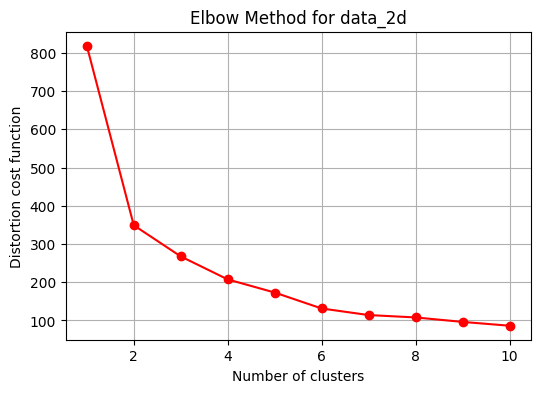

In [50]:
predict_2d = []
max_clusters_2d = 10
for i in range(1, max_clusters_2d + 1):
    kmeans_2d = KMeans(n_clusters=i, n_init='auto', random_state=0)
    kmeans_2d.fit(data_2d)
    predict_2d.append(kmeans_2d.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, max_clusters_2d + 1), predict_2d, marker='o', color='red')
plt.title('Elbow Method for data_2d')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion cost function')
plt.grid(True)
plt.show()

Оптимальна кількість кластерів - 2.

### Візуалізація результатів алгоритму кластеризації K-means

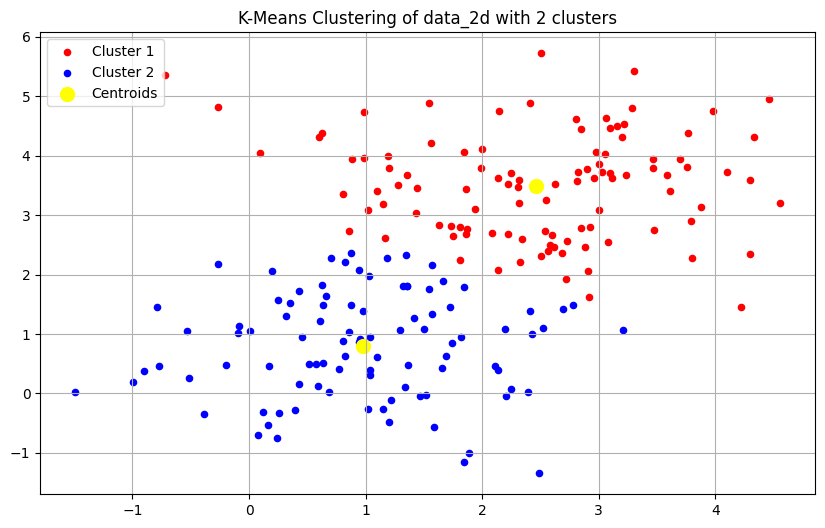

In [51]:
clusters_2d = 2

kmeans_2d = KMeans(n_clusters=clusters_2d, n_init='auto', random_state=0)
y_kmeans_2d = kmeans_2d.fit_predict(data_2d)

plt.figure(figsize=(10, 6))
plt.scatter(data_2d.iloc[y_kmeans_2d == 0, 0], data_2d.iloc[y_kmeans_2d == 0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(data_2d.iloc[y_kmeans_2d == 1, 0], data_2d.iloc[y_kmeans_2d == 1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title(f'K-Means Clustering of data_2d with {clusters_2d} clusters')
plt.legend()
plt.grid(True)
plt.show()

## Алгоритм K-means для датасету mnist

### Підготовка даних

In [52]:
df_mnist = pd.read_csv("data/mnist.csv", header=None)
df_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
first_column_unique = df_mnist.iloc[:, 0].unique()

first_column_unique

array([7, 2, 1, 0, 4, 9, 5, 6, 3, 8])

Перший стовпець містить унікальні значення, тому надалі використовуватись не буде.

In [54]:
data_mnist = df_mnist.iloc[:, 1:]

Зменшуємо розмірність даних до 2-вимірного варіанту

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(data_mnist)

### Застосування ліктевого методу

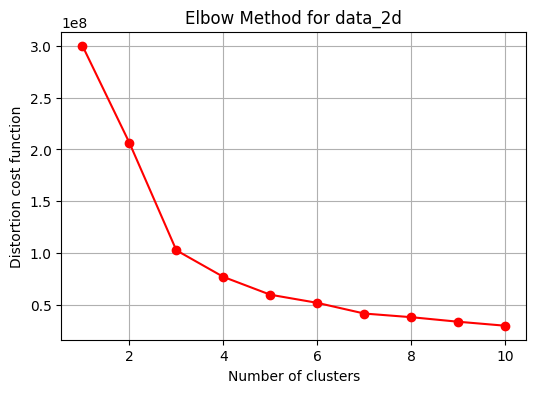

In [56]:
predict_mnist = []
max_clusters_2d = 10
for i in range(1, max_clusters_2d + 1):
    kmeans_2d = KMeans(n_clusters=i, n_init='auto', random_state=0)
    kmeans_2d.fit(mnist_2d)
    predict_mnist.append(kmeans_2d.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, max_clusters_2d + 1), predict_mnist, marker='o', color='red')
plt.title('Elbow Method for data_2d')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion cost function')
plt.grid(True)
plt.show()

Оптимальна кількість кластерів - 2.

### Візуалізація результатів алгоритму кластеризації K-means

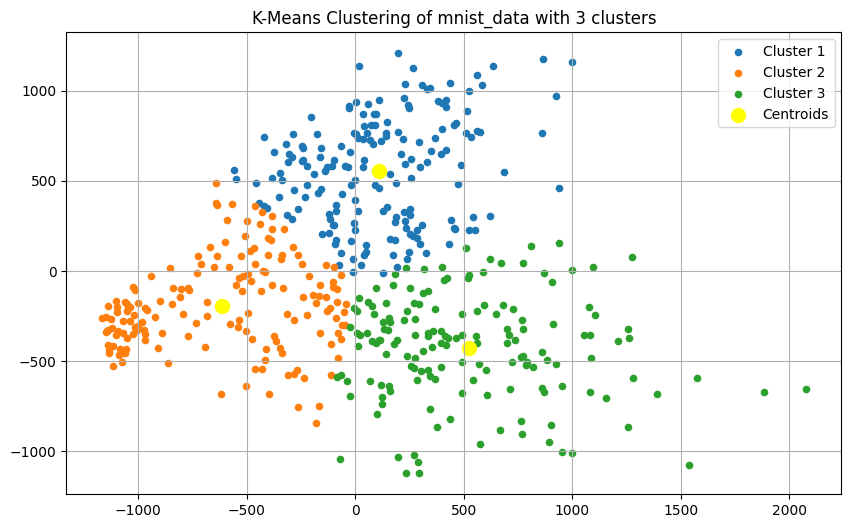

In [57]:
clusters_mnist = 3

kmeans_mnist = KMeans(n_clusters=clusters_mnist, n_init='auto', random_state=0)
y_kmeans_mnist = kmeans_mnist.fit_predict(mnist_2d)

plt.figure(figsize=(10, 6))
for cluster in range(clusters_mnist):
    plt.scatter(mnist_2d[y_kmeans_mnist == cluster, 0],
                mnist_2d[y_kmeans_mnist == cluster, 1],
                s=20, label=f'Cluster {cluster + 1}')

plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title(f'K-Means Clustering of mnist_data with {clusters_mnist} clusters')
plt.legend()
plt.grid(True)
plt.show()

## **Висновки**

Візуалізація результатів алгоритму кластеризації K-means демонструє коректне застосування алгоритму. Завдяки ліктьовому методу була визначена оптимальна кількість кластерів для кожного дата сету.